In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as scp
import netCDF4
import cartopy.crs as ccrs
import os

In [2]:
file_path = 'Tropics_tp&cape_5*5.nc'
  
#Opening dataset for tropics                                   
dsT = xr.open_dataset(file_path)

In [3]:
daily_meanT = dsT.resample(time='D').mean(dim='time')

avg_dsMT = dsT.mean(dim=['latitude', 'longitude'])  

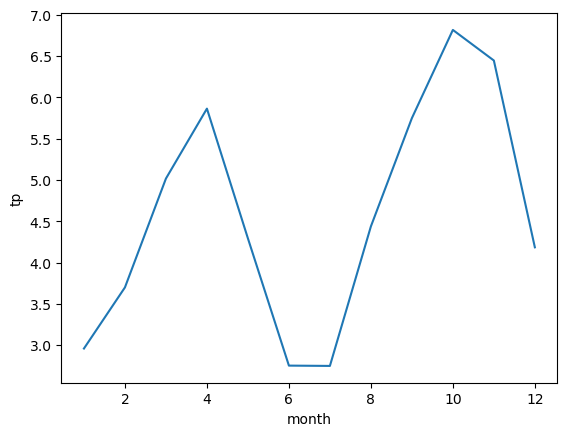

In [4]:
tp_mmpd = dsT['tp']*1e3*24
tp_spatial = tp_mmpd.mean(dim = ['latitude','longitude'])
tp_seasonal = tp_spatial.groupby('time.month').mean()
tp_seasonal.plot()



In [5]:

winter_data = avg_dsMT.sel(time=avg_dsMT['time.season']=='DJF')
spring_data = avg_dsMT.sel(time=avg_dsMT['time.season']=='MAM')
summer_data = avg_dsMT.sel(time=avg_dsMT['time.season']=='JJA')
fall_data = avg_dsMT.sel(time=avg_dsMT['time.season']=='SON')

In [6]:
cape_bins = np.linspace(0, 2500, 17)


# For Winter

winter_positive_precip = winter_data['tp'].where((winter_data['tp']*24000) > 1.0)
winter_cape_positive_precip = winter_data['cape'].where((winter_data['tp']*24000) > 1.0)
winter_binned_precipitation = winter_positive_precip.groupby_bins(winter_cape_positive_precip, bins=cape_bins)
winter_avgtp = winter_binned_precipitation.mean()
winter_cape_mid = (cape_bins[1:] + cape_bins[:-1])/2

# For Summer
summer_positive_precip = summer_data['tp'].where((summer_data['tp']*24000) > 1.0)
summer_cape_positive_precip = summer_data['cape'].where((summer_data['tp']*24000) > 1.0)
summer_binned_precipitation = summer_positive_precip.groupby_bins(summer_cape_positive_precip, bins=cape_bins)
summer_avgtp = summer_binned_precipitation.mean()
summer_cape_mid = (cape_bins[1:] + cape_bins[:-1])/2

# For Fall

fall_positive_precip = fall_data['tp'].where((fall_data['tp']*24000) > 1.0)
fall_cape_positive_precip = fall_data['cape'].where((fall_data['tp']*24000) > 1.0)
fall_binned_precipitation = fall_positive_precip.groupby_bins(fall_cape_positive_precip, bins=cape_bins)
fall_avgtp = fall_binned_precipitation.mean()
fall_cape_mid = (cape_bins[1:] + cape_bins[:-1])/2

# For Spring
spring_positive_precip = spring_data['tp'].where((spring_data['tp']*24000) > 1.0)
spring_cape_positive_precip = spring_data['cape'].where((spring_data['tp']*24000) > 1.0)
spring_binned_precipitation = spring_positive_precip.groupby_bins(spring_cape_positive_precip, bins=cape_bins)
spring_avgtp = spring_binned_precipitation.mean()
spring_cape_mid = (cape_bins[1:] + cape_bins[:-1])/2



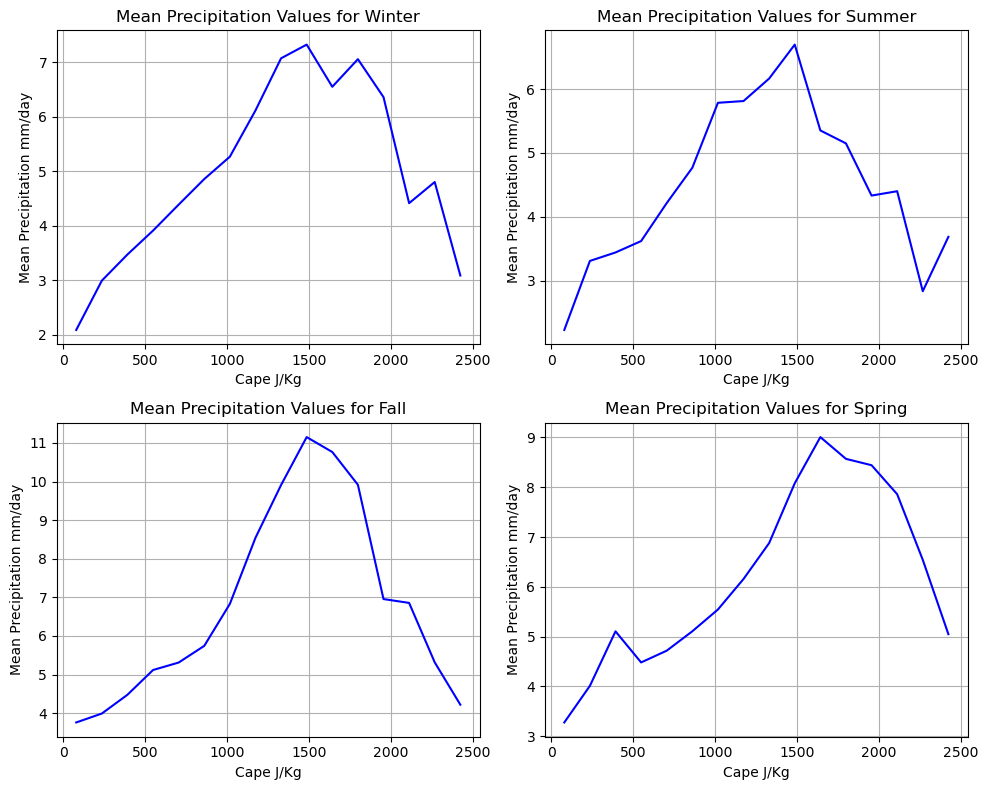

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot for Winter
axs[0, 0].plot(winter_cape_mid, winter_avgtp*24000, color='b', label='Winter')
axs[0, 0].set_xlabel('Cape J/Kg')
axs[0, 0].set_ylabel('Mean Precipitation mm/day')
axs[0, 0].set_title('Mean Precipitation Values for Winter')
axs[0, 0].grid(True)

# Plot for Summer
axs[0, 1].plot(winter_cape_mid, summer_avgtp*24000, color='b', label='Summer')
axs[0, 1].set_xlabel('Cape J/Kg')
axs[0, 1].set_ylabel('Mean Precipitation mm/day')
axs[0, 1].set_title('Mean Precipitation Values for Summer')
axs[0, 1].grid(True)


# Plot for Fall
axs[1, 0].plot(winter_cape_mid, fall_avgtp*24000, color='b', label='Fall')
axs[1, 0].set_xlabel('Cape J/Kg')
axs[1, 0].set_ylabel('Mean Precipitation mm/day')
axs[1, 0].set_title('Mean Precipitation Values for Fall')
axs[1, 0].grid(True)

# Plot for Spring
axs[1, 1].plot(winter_cape_mid, spring_avgtp*24000, color='b', label='Spring')
axs[1, 1].set_xlabel('Cape J/Kg')
axs[1, 1].set_ylabel('Mean Precipitation mm/day')
axs[1, 1].set_title('Mean Precipitation Values for Spring')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()